## OULAD: Open University Learning Analytics Dataset

A dataset containing demographical information about students, their courses attended and final results each of their course.

### Agenda

a. More about dataset<br>
b. Schema involved<br>
c. EDA exercise on OULAD dataset<br>
d. Folder structuring<br>
e. Conclusion<br>

### a. More about dataset

This page introduces the anonymised Open University Learning Analytics Dataset (OULAD). It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).

### b. Schema Involved

<img src="../static/imgs/model.png">

A data frame with 32593 rows and 12 variables:

code_module
Name of course, for which student registered

code_presentation
Name of semester, for which student registered

id_student
Unique integer identifiing each student

gender
Students gender

region
UK region, in which student lives

highest_education
Highest education student achieved before taking course

imd_band
Index of Multiple Deprivation (see https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015) percentile, students with imd_band lower than 20 comes from the most deprived regions

age_band
Age band of student

num_of_prev_attempts
Number of student previous attempts on the selected course

studied_credits
Total credits student is studiing at the Open University during period of the course

disability
Student claims disability of any type, logical

final_result
Student final result in the course

Region values
East Anglian Region

Scotland

North Western Region

South East Region

West Midlands Region

Wales

North Region

South Region

Ireland

South West Region

East Midlands Region

Yorkshire Region

London Region

See https://en.wikipedia.org/wiki/Regions_of_England for explanation.

Highest education values
HE Qualification - awarded after one year full-time study at the university or higher education institution

A Level or Equivalent - secondary school leaving qualification

Lower Than A Level - did not completed secondary school

Post Graduate Qualification - equal to Master degree more or less

No Formal quals - no previous formal education

Final result values
Pass - passed the course

Withdrawn - whithdrawn the course before offical end

Fail - failed the course after taking final exam

Distinction - passed course with outstanding results

Source
https://analyse.kmi.open.ac.uk/open_dataset

### c. EDA exercise on OULAD dataset

In [1]:
#Data loading/transformation
import numpy as np
import pandas as pd

In [2]:
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#function to display basic info for a given dataframe
def show_basic_info(df):
    print("========================================================================================================")
    print("HEAD:")
    print(df.head(3))
    print("--------------------------------------------------------------------------------------------------------")
    print("SHAPE:")
    print(df.shape)
    print("--------------------------------------------------------------------------------------------------------")
    print("INFO:")
    print(df.info())
    print("--------------------------------------------------------------------------------------------------------")
    print("DESCRIBE:")
    print(df.describe())
    print("--------------------------------------------------------------------------------------------------------")
    print("========================================================================================================")

    

In [4]:
#assessments_df = pd.read_csv('../data/raw/assessments.csv')
assessments_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/assessments.csv')
show_basic_info(assessments_df)

HEAD:
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(206, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB
None
--------------------------------

In [5]:
#courses_df = pd.read_csv('../data/raw/courses.csv')
courses_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/courses.csv')
show_basic_info(courses_df)

HEAD:
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
--------------------------------------------------------------------------------------------------------
SHAPE:
(22, 3)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
       module_presentation_length
count                   22.000000
mean                   255.54545

In [6]:
#studentAssessment_df = pd.read_csv('../data/raw/studentAssessment.csv')
studentAssessment_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentAssessment.csv')
show_basic_info(studentAssessment_df)

HEAD:
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(173912, 5)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173739 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
       id_assessment    i

In [7]:
#studentInfo_df = pd.read_csv('../data/raw/studentInfo.csv')
studentInfo_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentInfo.csv')
show_basic_info(studentInfo_df)

HEAD:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  
--------------------------------------------------------------------------------------------------------
SHAPE:
(32593, 12)
--------------------------------------------------------------------------------------------------------
INFO:
<

In [8]:
#studentRegistration_df = pd.read_csv('../data/raw/studentRegistration.csv')
studentRegistration_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentRegistration.csv')
show_basic_info(studentRegistration_df)

HEAD:
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
--------------------------------------------------------------------------------------------------------
SHAPE:
(32593, 5)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB

In [9]:
#vle_df = pd.read_csv('../data/raw/vle.csv')
vle_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/vle.csv')
show_basic_info(vle_df)

HEAD:
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
--------------------------------------------------------------------------------------------------------
SHAPE:
(6364, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
id_site              6364 non-null int64
code_module          6364 non-null object
code_presentation    6364 non-null object
activity_type        6364 non-null object
week_from            1121 non-null float64
week_to              1121 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None
---------------------------------

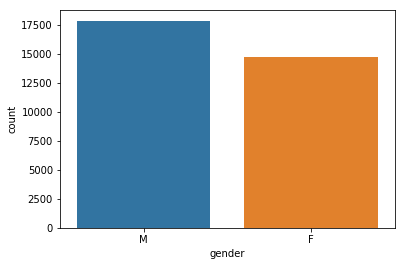

In [10]:
#Checking gender distribution
sns.countplot(studentInfo_df.gender);    #this shows that courses data is almost equally distributed on gender

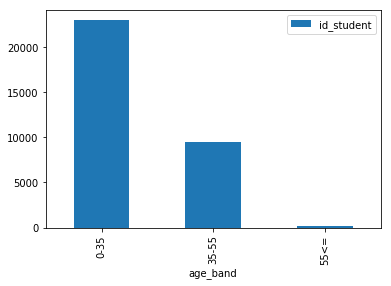

In [11]:
#Now let's try the same on age
studentInfo_df[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar();    #this shows majority of students fall in age band of 0-35

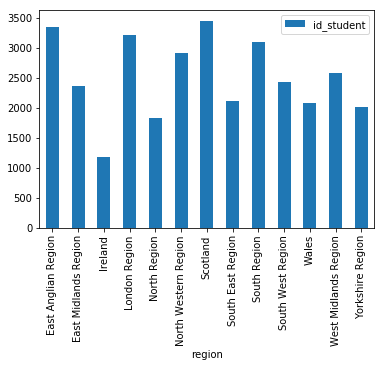

In [12]:
#Now let's try the same on region
studentInfo_df[['id_student', 'region']].groupby(by='region').count().plot.bar();

In [13]:
# What if we want to do a multi dimensional visualization?
# Pandas provide this using crosstab
# crosstab: Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors 
# unless an array of values and an aggregation function are passed.

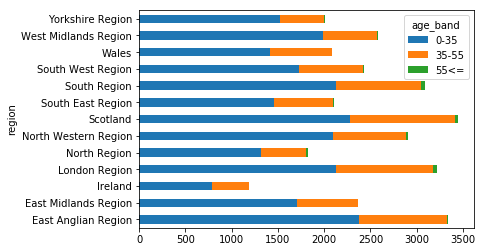

In [14]:
pd.crosstab(studentInfo_df.region, studentInfo_df.age_band).plot.barh(stacked = True);

In [15]:
# How to visualize continous variables, ouliers?
# Python provides us boxplot for this.
# boxplot:  The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the 
# distribution of data based on the five number summary: 
# minimum, first quartile, median, third quartile, and maximum.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

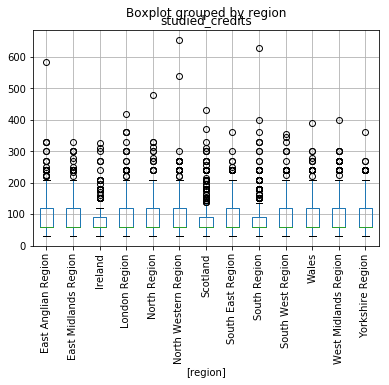

In [16]:
studentInfo_df.drop(['id_student', 'num_of_prev_attempts'], axis=1).boxplot(by = 'region')
plt.xticks(rotation = 90)    #without this, x-labels overlap

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

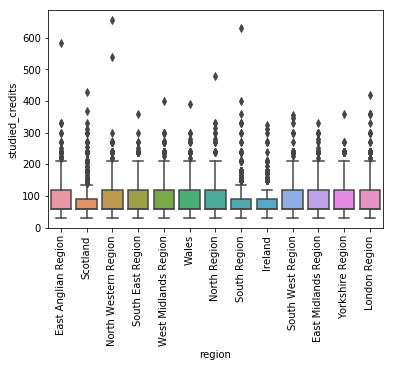

In [17]:
# plotting boxplot using seaborn
sns.boxplot(x = 'region', y = 'studied_credits', data=studentInfo_df)
plt.xticks(rotation = 90)

In [18]:
# selecting a subset of cols which are of importance to us and grouping them by student id and aggregating them using median
studentPerformance_df = studentInfo_df[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()

In [19]:
studentPerformance_df.head()

,num_of_prev_attempts,studied_credits
id_student,,
3733,0.0,60.0
6516,0.0,60.0
8462,0.5,75.0
11391,0.0,240.0
23629,2.0,60.0


In [20]:
# Here above if you notice, indices are random. Since we have selected it from df, we need to reset them
studentPerformance_df = studentPerformance_df.reset_index()

In [21]:
studentPerformance_df.head()

,id_student,num_of_prev_attempts,studied_credits
0,3733,0.0,60.0
1,6516,0.0,60.0
2,8462,0.5,75.0
3,11391,0.0,240.0
4,23629,2.0,60.0


In [30]:
studentPerformance_df.num_of_prev_attempts.unique()

array([0. , 0.5, 2. , 1. , 4. , 3. , 1.5, 2.5, 3.5, 5. , 5.5, 6. ])

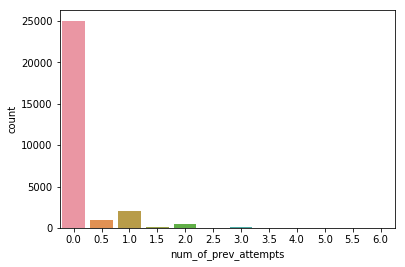

In [32]:
sns.countplot(studentPerformance_df.num_of_prev_attempts);

In [34]:
# the above countplot shows that most of the students are giving their 1st attempt (0 prev attempts)

In [35]:
studentProfile_df = studentInfo_df[['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band']].drop_duplicates()


In [36]:
show_basic_info(studentProfile_df)

HEAD:
   id_student gender                region      highest_education imd_band  \
0       11391      M   East Anglian Region       HE Qualification  90-100%   
1       28400      F              Scotland       HE Qualification   20-30%   
2       30268      F  North Western Region  A Level or Equivalent   30-40%   

  age_band  
0     55<=  
1    35-55  
2    35-55  
--------------------------------------------------------------------------------------------------------
SHAPE:
(28857, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28857 entries, 0 to 32592
Data columns (total 6 columns):
id_student           28857 non-null int64
gender               28857 non-null object
region               28857 non-null object
highest_education    28857 non-null object
imd_band             27877 non-null object
age_band             28857 non-null object
dtypes: int64(1), object(5)
me

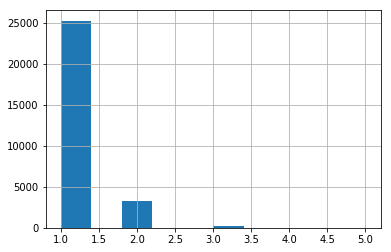

In [38]:
studentAges_df = studentInfo_df[['id_student', 'age_band']].groupby(['id_student']).count()
studentAges_df = studentAges_df.reset_index()
studentAges_df.age_band.hist();

In [39]:
# majority of the students fall in age band of 0-35

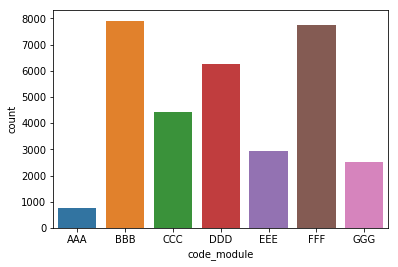

In [41]:
sns.countplot(studentInfo_df.code_module)

In [42]:
# course BBB and FFF are very famous

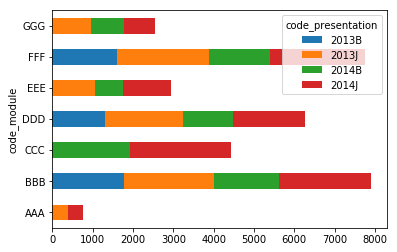

In [43]:
pd.crosstab(studentInfo_df.code_module, studentInfo_df.code_presentation).plot.barh(stacked = True);

In [44]:
# 'B' is for courses offered in Feb and 'J' is for courses offered in Oct.
# course 'CCC' is something introduced in 2014 only.
# course 'AAA' has a very low student count as compared to other courses

In [48]:
studentInfo_df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


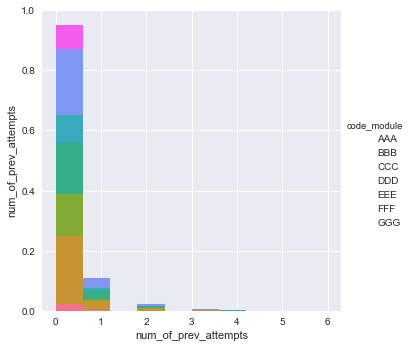

In [84]:
sns.pairplot(data=studentInfo_df[["code_module","num_of_prev_attempts"]],hue="code_module", dropna=True, size=5);

In [62]:
studentModuleLengths_df = studentInfo_df.merge(courses_df, on = ['code_module', 'code_presentation'], how='left')
studentModuleLengths_df = studentModuleLengths_df[['id_student', 'module_presentation_length']].groupby('id_student').median()
studentModuleLengths_df = studentModuleLengths_df.reset_index()

In [66]:
show_basic_info(studentModuleLengths_df)

HEAD:
   id_student  module_presentation_length
0        3733                       261.0
1        6516                       269.0
2        8462                       261.5
--------------------------------------------------------------------------------------------------------
SHAPE:
(28785, 2)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 2 columns):
id_student                    28785 non-null int64
module_presentation_length    28785 non-null float64
dtypes: float64(1), int64(1)
memory usage: 449.8 KB
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
         id_student  module_presentation_length
count  2.878500e+04                28785.000000
mean   7.074447e+05                  255.990446
std    5.504403e+05                   12.843428
min    3.733000e

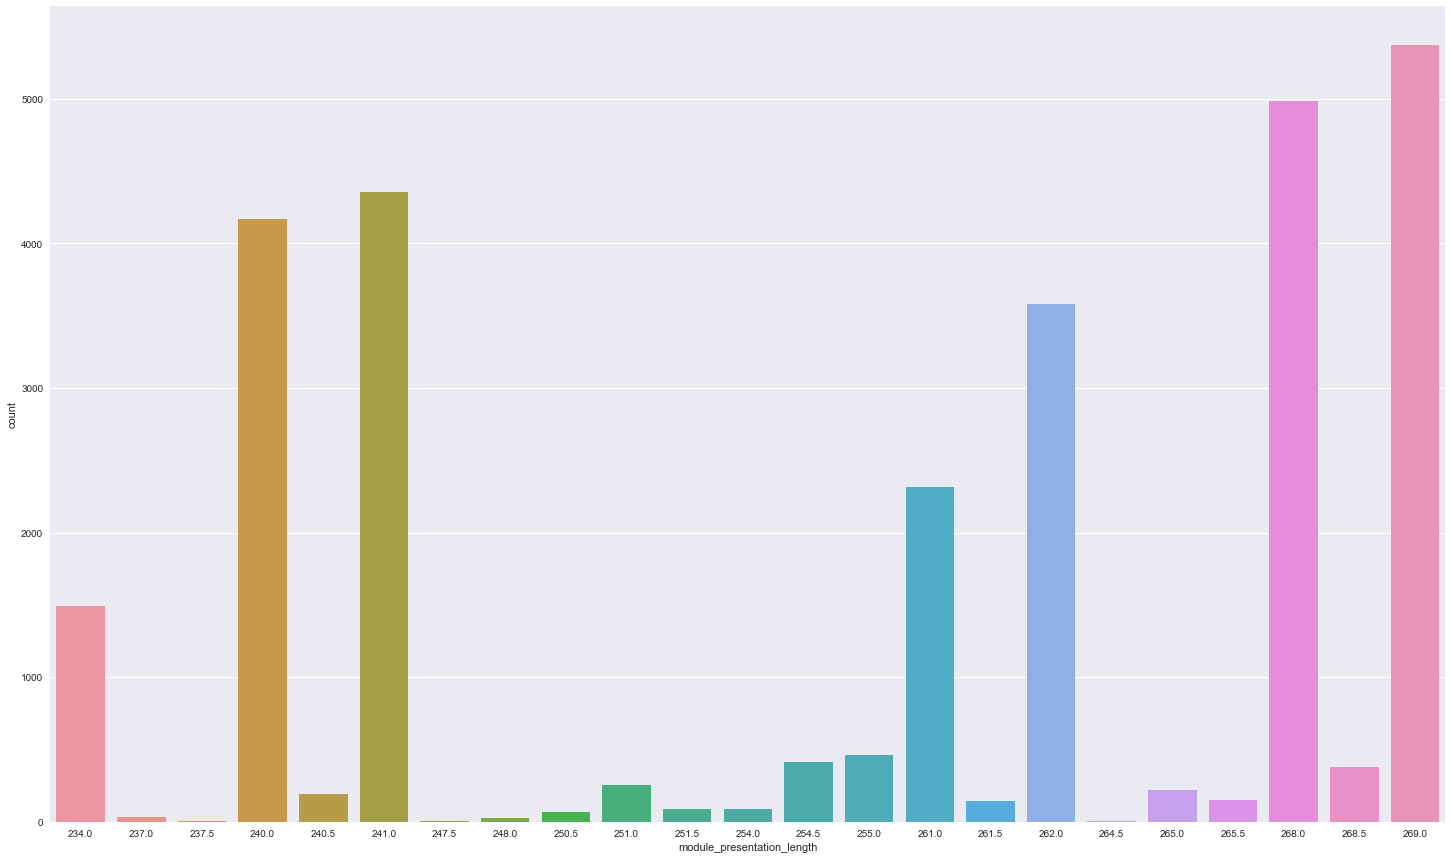

In [85]:
sns.countplot(studentModuleLengths_df.module_presentation_length);

In [76]:
studentRegistration_df['unregistered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)
studentRegistration_df['registered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)

In [112]:
studentRegistration_df['register_days'] = (np.where(pd.isnull(studentRegistration_df.date_registration), 0, 
                                          studentRegistration_df.date_registration)).astype(int)
studentRegistration_df['unregister_days'] = (np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 
                                            studentRegistration_df.date_unregistration)).astype(int)
studentRegDays_df = studentRegistration_df[['id_student', 'register_days', 
                                   'unregister_days']].groupby(['id_student']).mean()
studentRegDays_df = studentRegDays_df.reset_index()
studentRegDays_df.head()

,id_student,register_days,unregister_days
0,3733,-68.0,-8.0
1,6516,-52.0,0.0
2,8462,-87.5,68.5
3,11391,-159.0,0.0
4,23629,-47.0,0.0


In [79]:
studentInterest_df = studentRegistration_df[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
studentInterest_df = studentInterest_df.reset_index()

In [80]:
show_basic_info(studentInterest_df)

HEAD:
   id_student  registered  unregistered
0        3733           1             1
1        6516           0             0
2        8462           2             2
--------------------------------------------------------------------------------------------------------
SHAPE:
(28785, 3)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
id_student      28785 non-null int64
registered      28785 non-null int32
unregistered    28785 non-null int32
dtypes: int32(2), int64(1)
memory usage: 449.8 KB
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
         id_student    registered  unregistered
count  2.878500e+04  28785.000000  28785.000000
mean   7.074447e+05      0.349904      0.349904
std    5.504403e+05      0.549577      0.549577
min    3.733000e+03

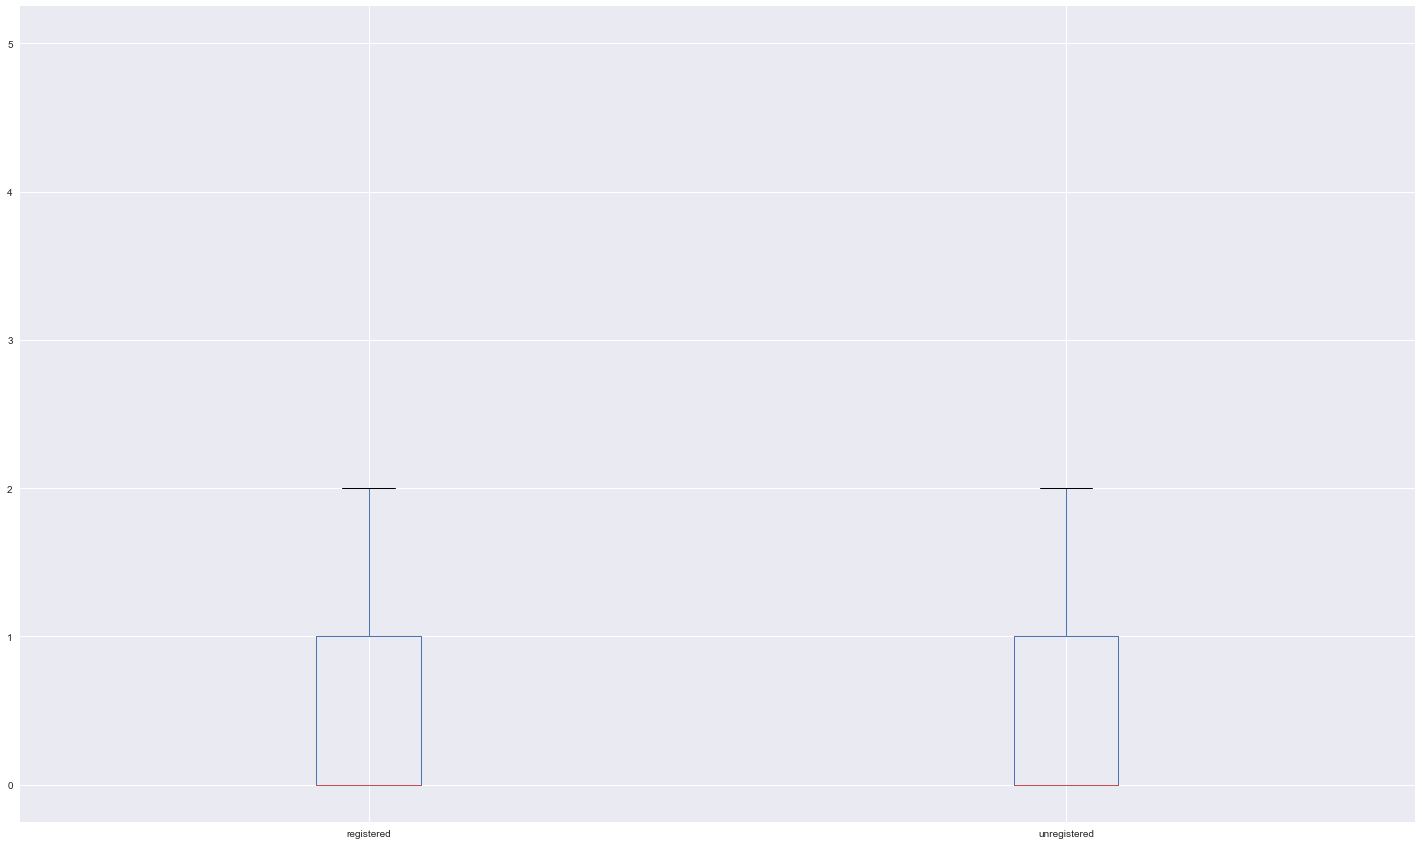

In [86]:
studentInterest_df[['registered', 'unregistered']].boxplot();


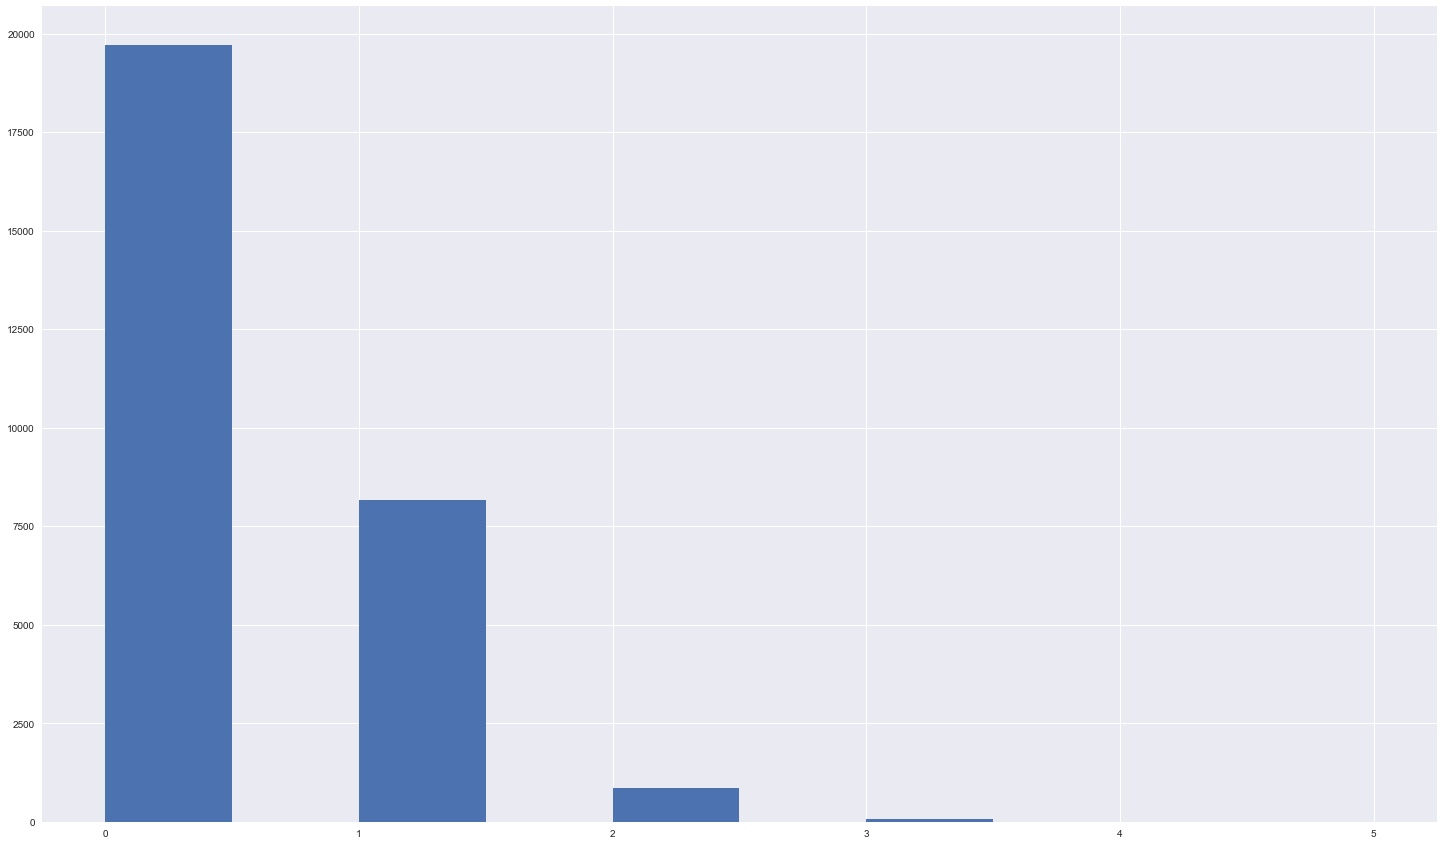

In [83]:
studentInterest_df.unregistered.hist();

In [89]:
studentAssessment_df['score'] = (np.where(pd.isnull(studentAssessment_df.score), 0, studentAssessment_df.score)).astype(int)

In [90]:
studentAssessment_df['assessment_mean'] = studentAssessment_df['score'].groupby(studentAssessment_df['id_assessment']) \
.transform('mean')

In [91]:
studentAssessment_df['score_std'] = studentAssessment_df.score/studentAssessment_df.assessment_mean


In [92]:
studentScoring_df = studentAssessment_df[['id_student', 
                                          'score_std']].groupby(['id_student']).median()
studentScoring_df = studentScoring_df.reset_index()
studentScoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23369 entries, 0 to 23368
Data columns (total 2 columns):
id_student    23369 non-null int64
score_std     23369 non-null float64
dtypes: float64(1), int64(1)
memory usage: 365.2 KB


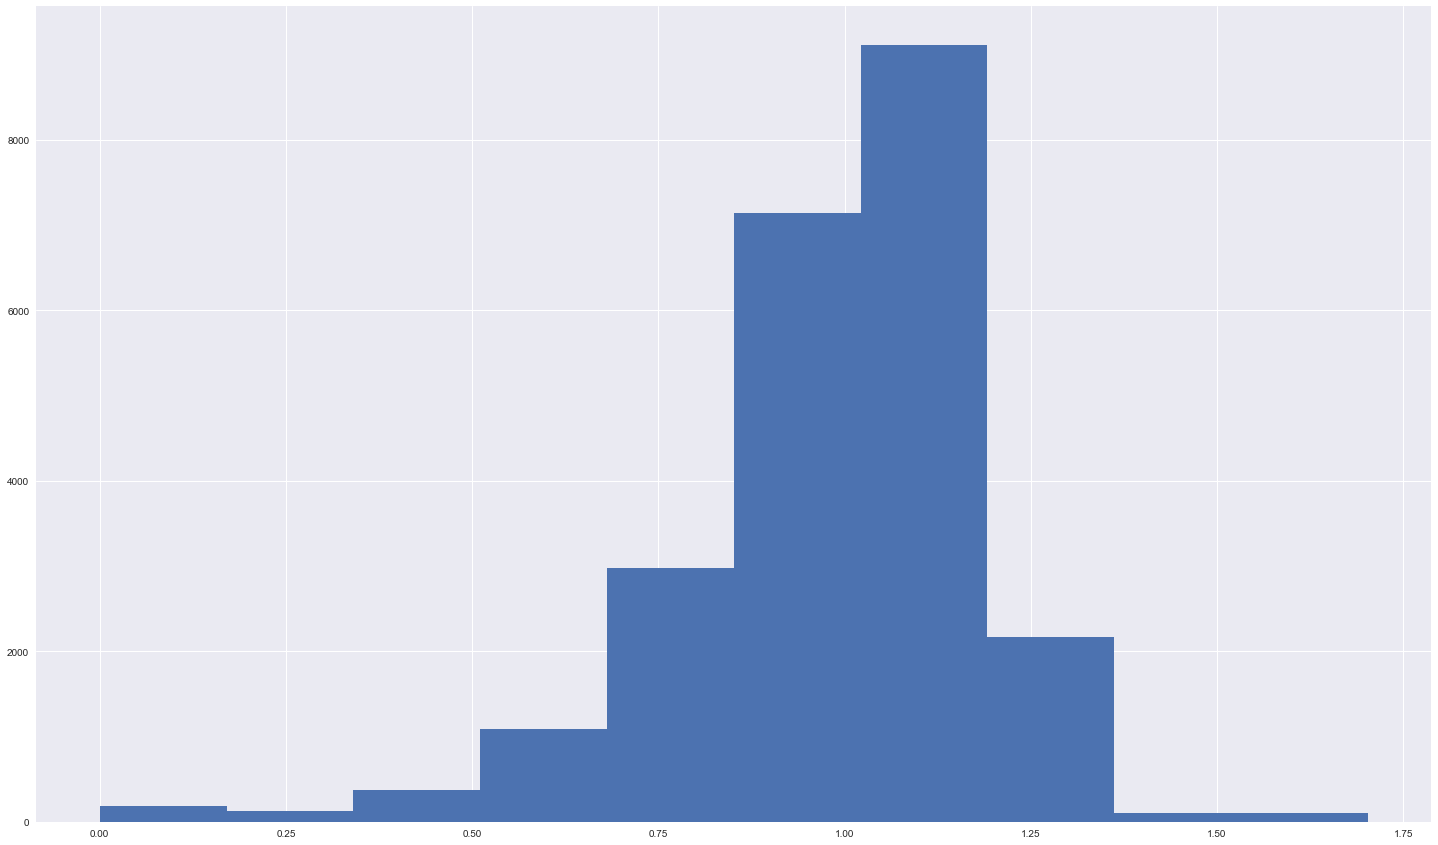

In [93]:
studentScoring_df.score_std.hist();

In [95]:
# splitting big file ~400+ MB into smaller chunks

#for i,chunk in enumerate(pd.read_csv('../data/raw/studentVle.csv', chunksize=1500000)):
#    chunk.to_csv('../data/raw/studentVle_{}.csv'.format(i))

In [118]:
studentVle_df1 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_0.csv')

In [119]:
studentVle_df2 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_1.csv')

In [120]:
studentVle_df3 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_2.csv')

In [121]:
studentVle_df4 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_3.csv')

In [122]:
studentVle_df5 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_4.csv')

In [123]:
studentVle_df6 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_5.csv')

In [124]:
studentVle_df7 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_6.csv')

In [125]:
studentVle_df8 = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentVle_7.csv')

In [98]:
studentVle_df = pd.concat([studentVle_df1,studentVle_df2, studentVle_df3, studentVle_df4, studentVle_df5, studentVle_df6, studentVle_df7, studentVle_df8])

In [126]:
studentVle_df.shape

(10655280, 12)

In [100]:
show_basic_info(studentVle_df)

HEAD:
   Unnamed: 0 code_module code_presentation  id_student  id_site  date  \
0           0         AAA             2013J       28400   546652   -10   
1           1         AAA             2013J       28400   546652   -10   
2           2         AAA             2013J       28400   546652   -10   

   sum_click  
0          4  
1          1  
2          1  
--------------------------------------------------------------------------------------------------------
SHAPE:
(10655280, 7)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655280 entries, 0 to 155279
Data columns (total 7 columns):
Unnamed: 0           int64
code_module          object
code_presentation    object
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtypes: int64(5), object(2)
memory usage: 650.3+ MB
None
----------------------------------------

In [102]:
studentVle_df = studentVle_df.merge(vle_df, on = 'id_site', how = 'left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

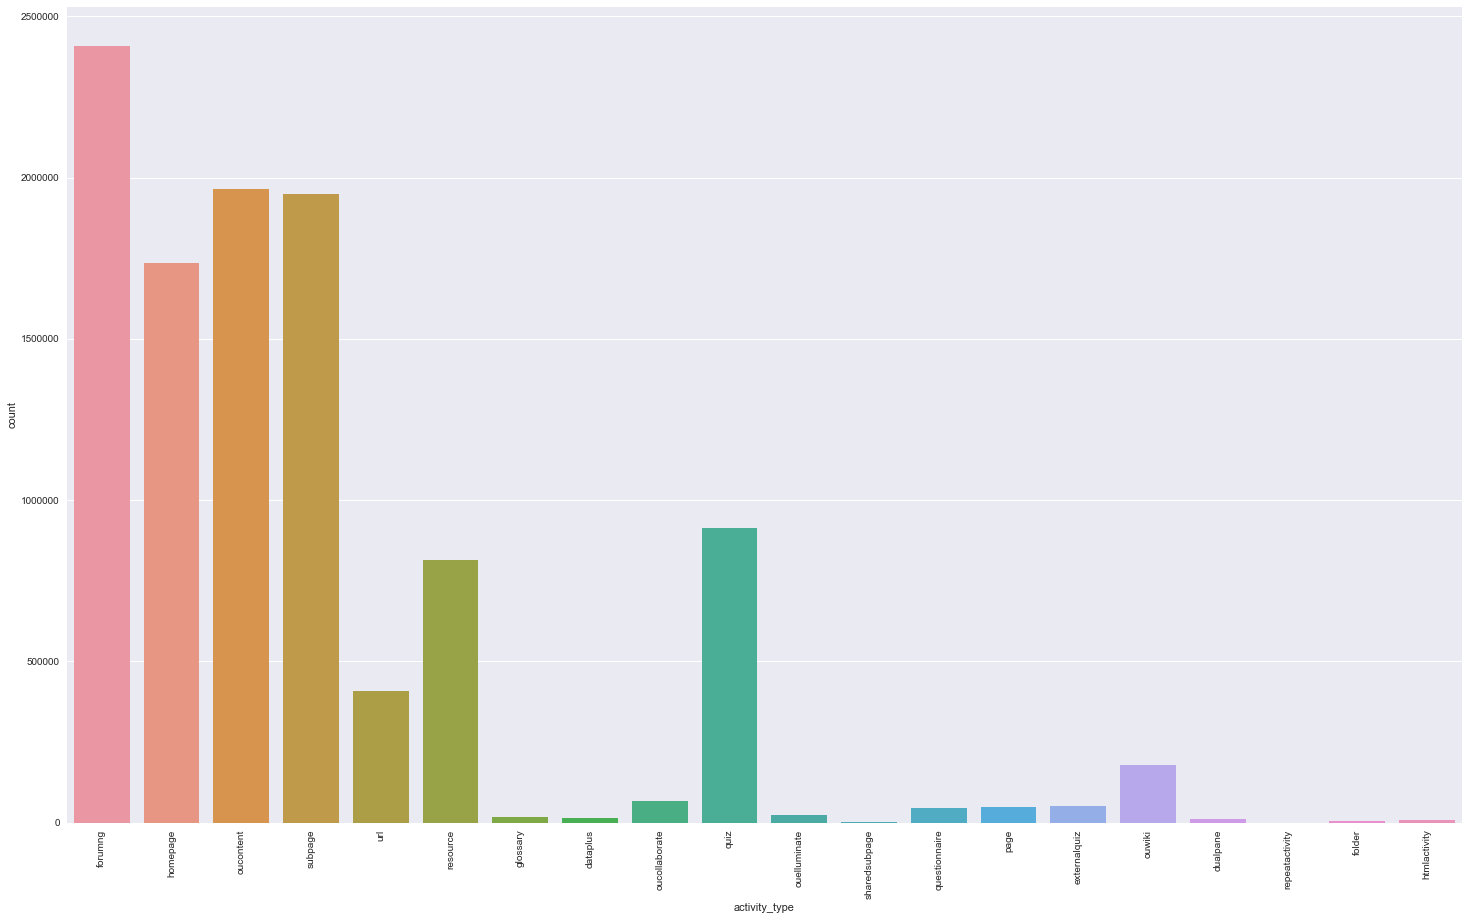

In [103]:
sns.countplot(studentVle_df.activity_type)
plt.xticks(rotation = 90)

In [104]:
studentInteractivity_df = studentVle_df[['id_student', 
                                     'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
studentInteractivity_df = studentInteractivity_df.reset_index()
studentInteractivity_df.head()

,id_student,activity_type,sum_click
0,6516,dataplus,5.250000
1,6516,forumng,2.577143
2,6516,homepage,3.145570
3,6516,oucontent,8.179348
4,6516,resource,1.631579


In [106]:
# pivoting will help us reduce multiple rows per student to one single row with multiple columns 
# After this we can visualize the columns with missing data

In [107]:
import missingno as msno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 21 columns):
id_student        26074 non-null int64
dataplus          26074 non-null float64
dualpane          26074 non-null float64
externalquiz      26074 non-null float64
folder            26074 non-null float64
forumng           26074 non-null float64
glossary          26074 non-null float64
homepage          26074 non-null float64
htmlactivity      26074 non-null float64
oucollaborate     26074 non-null float64
oucontent         26074 non-null float64
ouelluminate      26074 non-null float64
ouwiki            26074 non-null float64
page              26074 non-null float64
questionnaire     26074 non-null float64
quiz              26074 non-null float64
repeatactivity    26074 non-null float64
resource          26074 non-null float64
sharedsubpage     26074 non-null float64
subpage           26074 non-null float64
url               26074 non-null float64
dtypes: float64(20), int64(1)
me

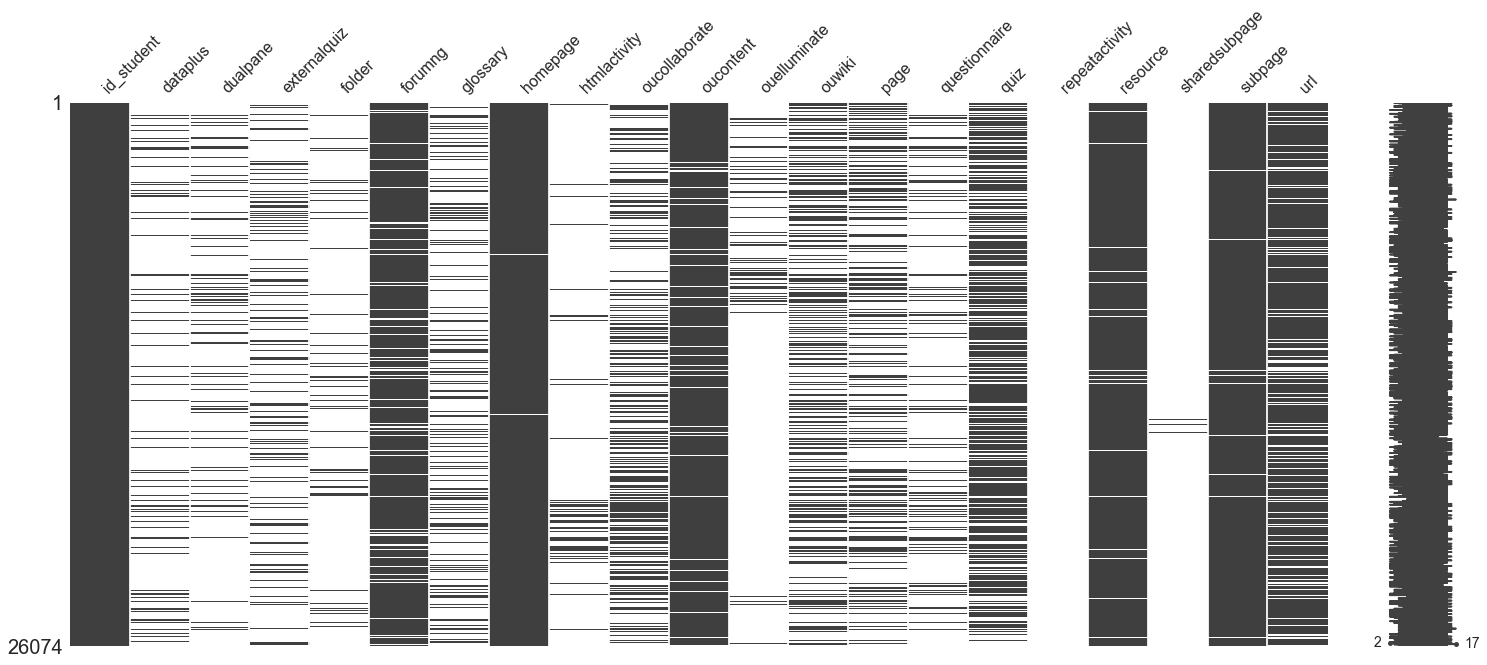

In [108]:
studentInteractivity_df = studentInteractivity_df.pivot(index='id_student', 
                                                    columns='activity_type', values='sum_click')
studentInteractivity_df = studentInteractivity_df.reset_index()
msno.matrix(studentInteractivity_df)
studentInteractivity_df = studentInteractivity_df.fillna(0)
studentInteractivity_df.info()

In [109]:
studentInteractivity_df = studentInteractivity_df[['id_student', 'forumng', 'homepage', 'oucollaborate',
       'oucontent', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'resource', 'subpage', 'url']]

In [113]:
dataset = studentPerformance_df.merge(studentModuleLengths_df, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentInterest_df, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentRegistration_df[['id_student', 'register_days']], 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentScoring_df, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentInteractivity_df, 
                                    on = 'id_student', how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 19 columns):
id_student                    32593 non-null int64
num_of_prev_attempts          32593 non-null float64
studied_credits               32593 non-null float64
module_presentation_length    32593 non-null float64
registered                    32593 non-null int32
unregistered                  32593 non-null int32
register_days                 32593 non-null int32
score_std                     26746 non-null float64
forumng                       29741 non-null float64
homepage                      29741 non-null float64
oucollaborate                 29741 non-null float64
oucontent                     29741 non-null float64
ouwiki                        29741 non-null float64
page                          29741 non-null float64
questionnaire                 29741 non-null float64
quiz                          29741 non-null float64
resource                      29741 non-null float6

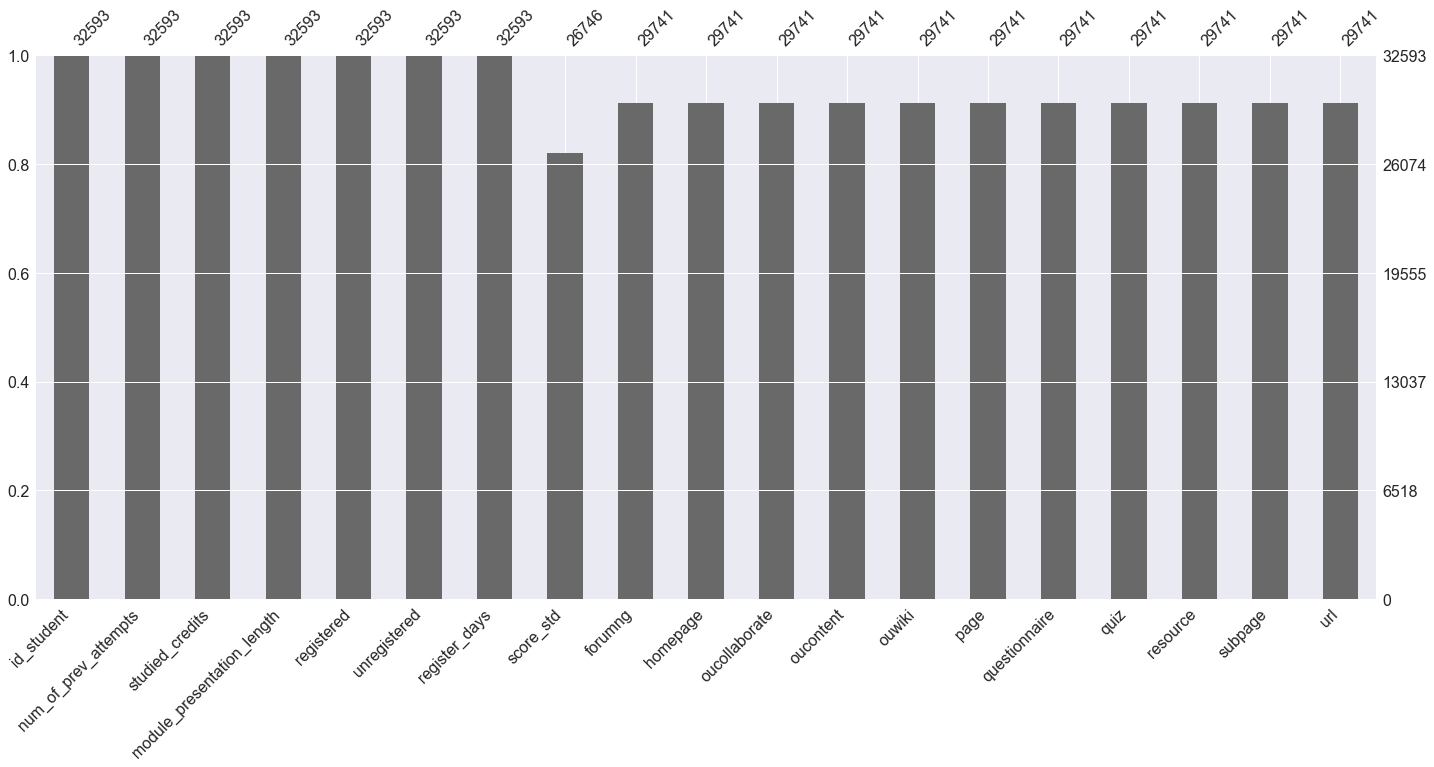

In [115]:
msno.bar(dataset)
dataset = dataset.fillna(0)

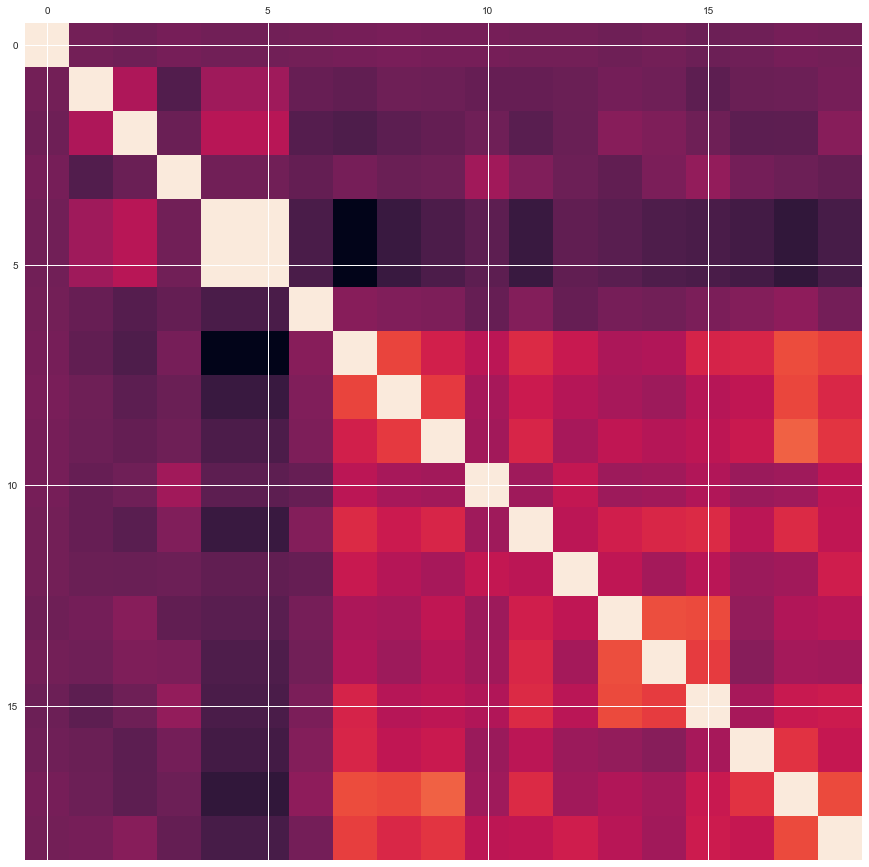

In [117]:
plt.matshow(dataset.corr());

In [128]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [129]:
# Scaling the data to bring into one range
sc = RobustScaler()


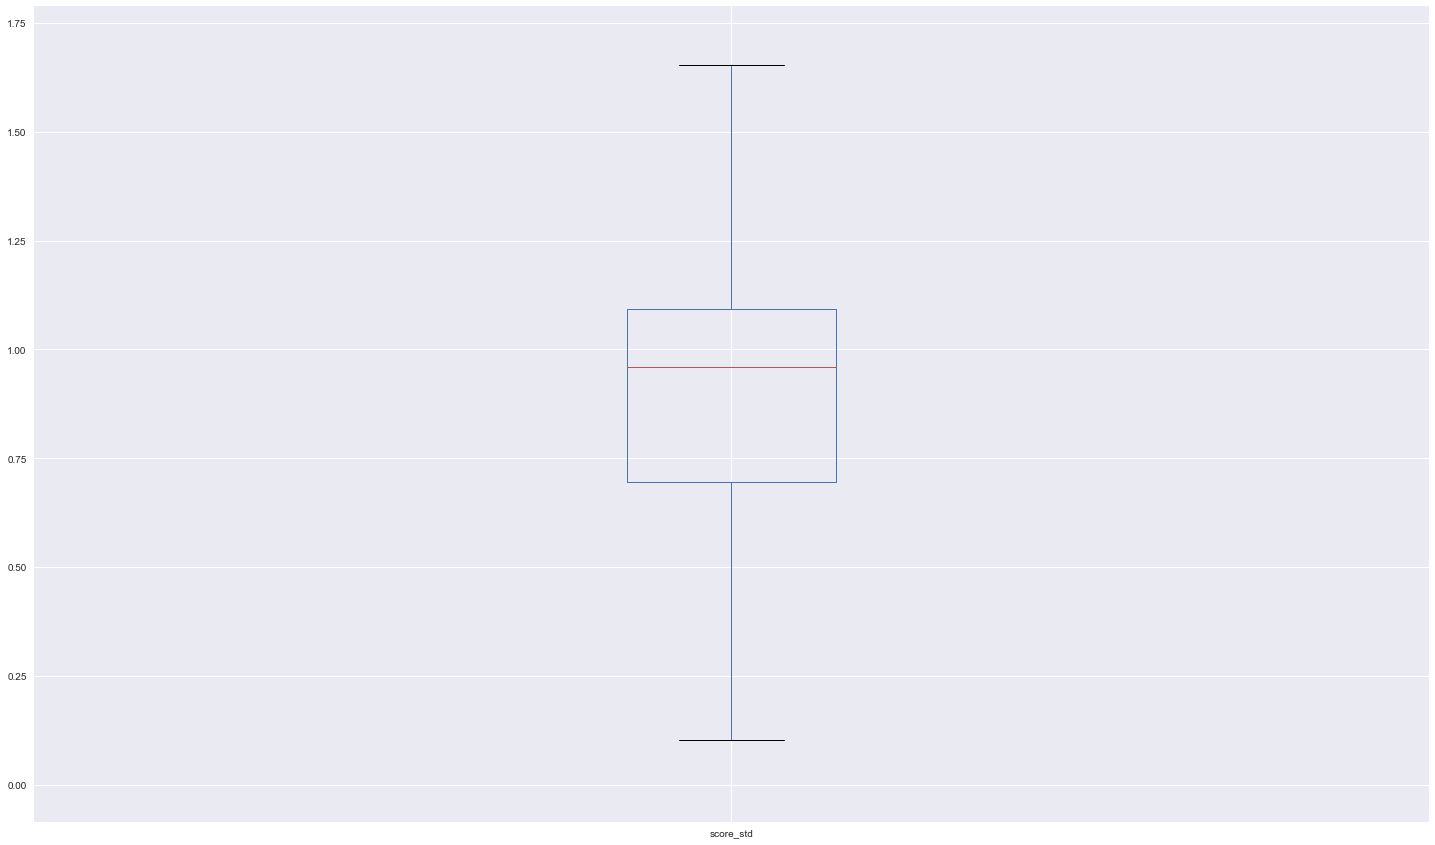

In [131]:
dataset.score_std.plot.box()

In [132]:
# clustering

In [133]:
data_clust = sc.fit_transform(dataset)
data_clust.shape

(32593, 19)

In [ ]:
studentCluster_df = pd.DataFrame({'id_student': dataset.id_student, 'cluster':kmeans[1] + 1})
student_cluster.info()

studentDetails_df = studentProfile_df.merge(studentCluster, on = 'id_student', how = 'left')
studentDetails_df.cluster = studentDetails_df.cluster.apply(str)
studentDetails_df.info()

In [135]:
pd.crosstab(studentDetails_df.region, studentDetails_df.type).plot.bar(width = 0.85, figsize=(20,10), 
                                                                    colormap='RdYlGn')

NameError: name 'studentDetails_df' is not defined